# BetFair Maps

In [1]:
# Import the required libraries
import hvplot.pandas
import pandas as pd
import seaborn as sns

# let use seaborn theme
sns.set()

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# open the sports_location csv file
games_df = pd.read_csv("output/sports_location.csv")
games_df.head(5)

,SPORTS_ID,FULL_DESCRIPTION,NUMBER_BETS,VOLUME_MATCHED,WIN_AMOUNT,LOSS_AMOUNT,SETTLED_DATE,COUNTRY,CITY,LATITUDE,LONGITUDE,TEMPERATURE,RAIN
0,Golf,Group B/BMW Championship 2014,149070,4712927.68,5.190166e+06,8.088417e+07,5/9/14 17:40,USA,"Cherry Hills Village, CO",39.641654,-104.959425,16.6,0
1,Golf,Group B/BMW Championship 2014/Tournament Match...,152,3633.26,6.218803e+03,5.955442e+02,7/9/14 22:20,USA,"Cherry Hills Village, CO",39.641654,-104.959425,27.4,0
2,Golf,Group B/Chiquita Classic 2014,1321,6892.82,4.048800e+02,6.530881e+05,7/9/14 20:11,USA,"Davidson, NC",35.499261,-80.848522,29.2,0
3,Golf,Group B/Deutsche Bank Championship 2014,166663,4672132.07,3.546043e+06,1.027464e+08,1/9/14 21:53,USA,"Norton, Massachusetts",41.966767,-71.186994,28.3,0
4,Golf,Group B/Deutsche Bank Championship 2014/Tourna...,415,10449.26,1.569752e+04,3.782393e+03,1/9/14 22:08,USA,"Norton, Massachusetts",41.966767,-71.186994,28.3,0


In [3]:
# lets map all games
map_plot_1 = games_df.hvplot.points(
    "LONGITUDE",
    "LATITUDE",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "NUMBER_BETS",
    scale = 0.08,
    color = "SPORTS_ID",
    hover_cols = ["WIN_AMOUNT", "LOSS_AMOUNT"]
)

# Display the map plot_1
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (SPORTS_ID,NUMBER_BETS,WIN_AMOUNT,LOSS_AMOUNT)

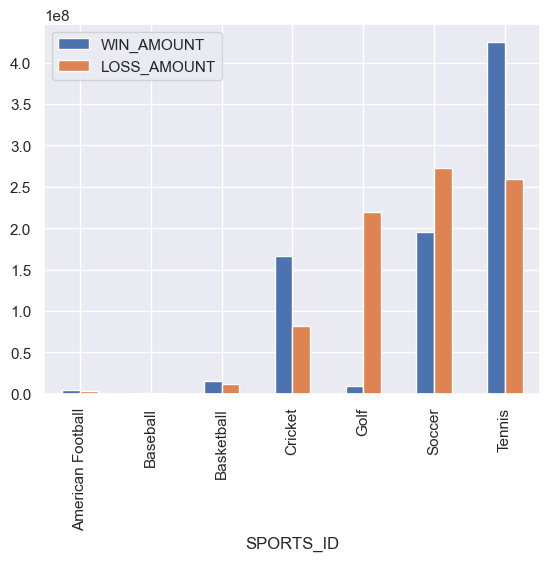

In [4]:
# plot barplot group by sports
sport_df = games_df.groupby("SPORTS_ID")
sport_df[["WIN_AMOUNT", "LOSS_AMOUNT"]].sum().plot.bar();

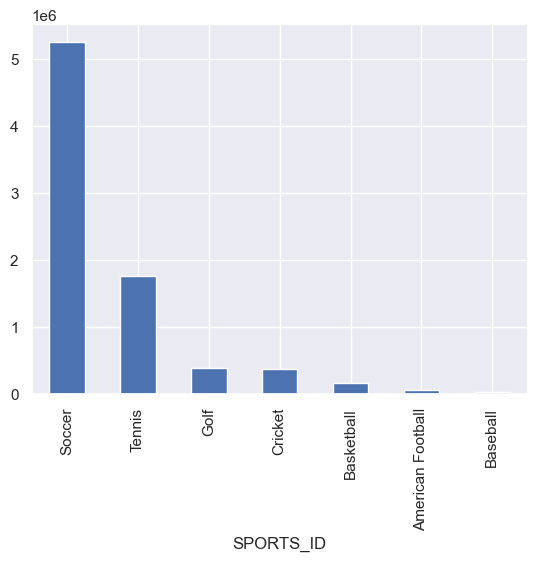

In [5]:
sport_df["NUMBER_BETS"].sum().sort_values(ascending=False).plot.bar();

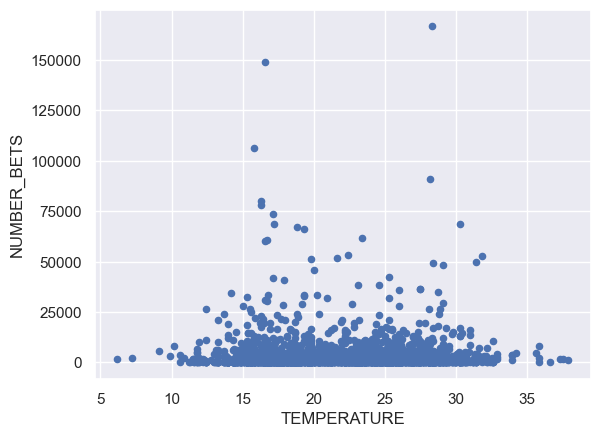

In [6]:
# let compare temperature and bet amount
games_df.plot.scatter("TEMPERATURE", "NUMBER_BETS");

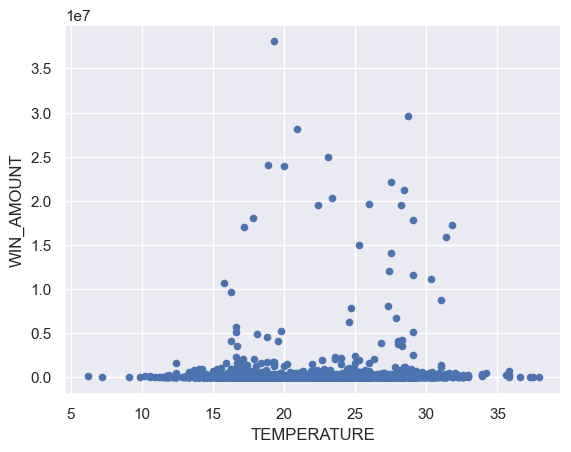

In [7]:
games_df.plot.scatter("TEMPERATURE", "WIN_AMOUNT");

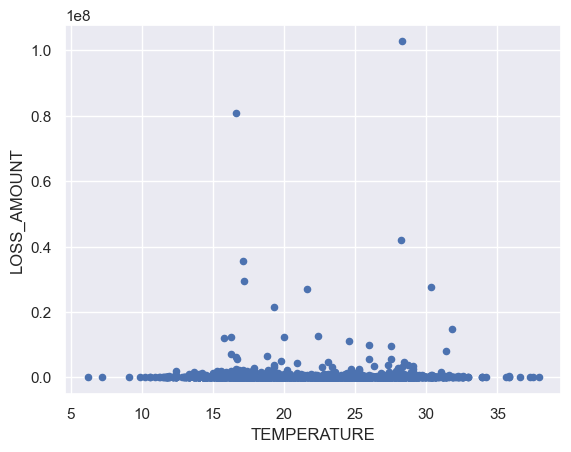

In [8]:
games_df.plot.scatter("TEMPERATURE", "LOSS_AMOUNT");

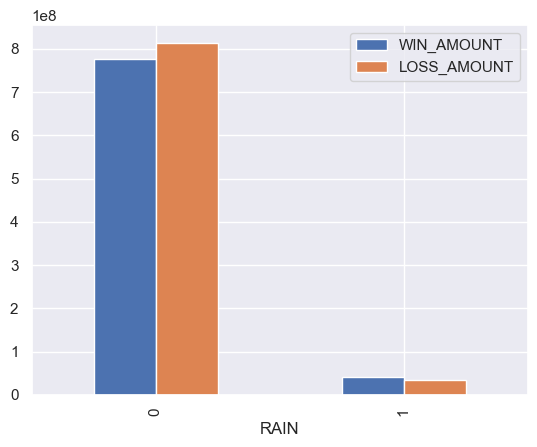

In [9]:
weather_df = games_df.groupby("RAIN")
weather_df[["WIN_AMOUNT", "LOSS_AMOUNT"]].sum().plot.bar();

In [6]:
# load in the main final dataset
betfair_df = pd.read_pickle("resources/betfair_final.pkl")
betfair_df.head()

,SPORTS_ID,EVENT_ID,SETTLED_DATE,FULL_DESCRIPTION,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,...,WIN_FLAG,IN_PLAY,WIN_AMOUNT,LOSS_AMOUNT,COUNTRY,CITY,LATITUDE,LONGITUDE,TEMPERATURE,RAIN
0,Soccer,115279736,04-09-2014 17:07:30,U21 Euro Championship/Qualifiers/Fixtures 04 S...,04-09-2014 15:30,Over/Under 1.5 Goals,04-09-2014 15:32:39,1221386,Over 1.5 Goals,1.35,...,1,IP,1033.4790,0.0,Ukraine,Kyiv,50.450034,30.524136,17.1,0.0
1,Tennis,115288925,04-09-2014 11:50:25,Group A/Brasov Challenger 2014/Second Round Ma...,04-09-2014 10:30,Match Odds,04-09-2014 10:34:32,7659748,Aslan Karatsev,1.12,...,1,IP,4297.1040,0.0,Romania,Brasov,45.652510,25.610565,22.1,0.0
2,Soccer,115196118,03-09-2014 15:08:55,U21 Euro Championship/Qualifiers/Fixtures 03 S...,03-09-2014 14:00,Over/Under 1.5 Goals,03-09-2014 14:00:45,1221386,Over 1.5 Goals,2.10,...,1,IP,1313.6340,0.0,Latvia,Riga,56.949398,24.105185,17.4,0.0
3,Soccer,115236324,01-09-2014 19:46:39,Irish Soccer/FAI Ford Cup/Fixtures 01 Septembe...,01-09-2014 19:00,Over/Under 0.5 Goals,01-09-2014 19:01:34,5851483,Over 0.5 Goals,1.10,...,1,IP,1294.1060,0.0,Ireland,Dublin,53.349379,-6.260559,16.1,0.0
4,Soccer,115184779,02-09-2014 18:38:14,Swedish Soccer/Superettan/Fixtures 02 Septembe...,02-09-2014 17:20,Over/Under 1.5 Goals,02-09-2014 17:20:13,1221386,Over 1.5 Goals,1.34,...,1,IP,1210.2612,0.0,Sweden,Stockholm,59.325117,18.071093,15.3,0.0


In [7]:
country_df = betfair_df.groupby("COUNTRY")
country_df = country_df[["WIN_FLAG", "WIN_AMOUNT", "LOSS_AMOUNT", "LATITUDE", "LONGITUDE"]].mean()
country_df["MORE_WINS"] = country_df["WIN_FLAG"].apply(lambda x: "MORE WINS" if x >= 0.5 else "MORE LOSSES")

In [8]:
# lets map all games
map_plot_2 = country_df.hvplot.points(
    "LONGITUDE",
    "LATITUDE",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "WIN_FLAG",
    color= "MORE_WINS",
    scale = 20,
    hover_cols = ["WIN_AMOUNT", "LOSS_AMOUNT"]
)

# Display the map plot_1
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (MORE_WINS,WIN_FLAG,WIN_AMOUNT,LOSS_AMOUNT)

In [10]:
underdogs_df = betfair_df.loc[betfair_df["ODDS"] > 3.3, ]
underdogs_df = underdogs_df.groupby("COUNTRY")
ucountry_df = underdogs_df[["WIN_FLAG", "WIN_AMOUNT", "LOSS_AMOUNT", "LATITUDE", "LONGITUDE"]].mean()
ucountry_df["MORE_WINS"] = ucountry_df["WIN_FLAG"].apply(lambda x: "MORE WINS" if x >= 0.5 else "MORE LOSSES")

In [12]:
# lets map all games
map_plot_3 = ucountry_df.hvplot.points(
    "LONGITUDE",
    "LATITUDE",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "WIN_FLAG",
    color= "MORE_WINS",
    scale = 40,
    hover_cols = ["WIN_AMOUNT", "LOSS_AMOUNT"]
)

# Display the map plot_1
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (MORE_WINS,WIN_FLAG,WIN_AMOUNT,LOSS_AMOUNT)